In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier

%matplotlib inline
plt.style.use('ggplot')

In [2]:
from gp_sandbox.gaussian_processes import GPBinaryClassifier

In [3]:
n_train = 200
x_train = np.random.uniform(0, 1, n_train)
X_train = x_train.reshape((-1,1))
y_train = 2*(x_train > 0.5)-1

n_test = 200
x_test = np.linspace(0, 1, n_test)
X_test = x_test.reshape((-1,1))
y_test = 2*(x_test > 0.5)-1

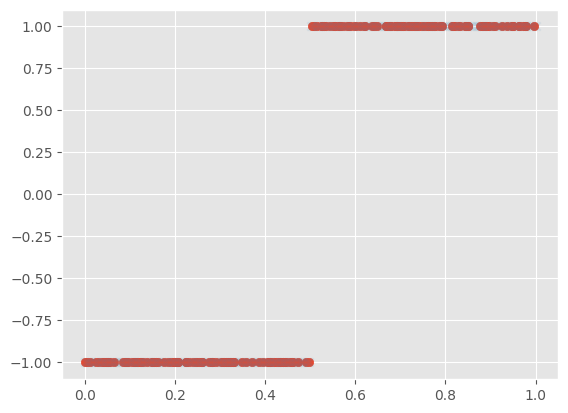

In [4]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='x', alpha=0.1)

In [5]:
gpc = GPBinaryClassifier().fit(X_train, y_train)
gpc.log_marginal_likelihood()

-6.653459352778267

In [6]:
proba, mean, var = gpc.predict(X_test, return_mean_var=True)

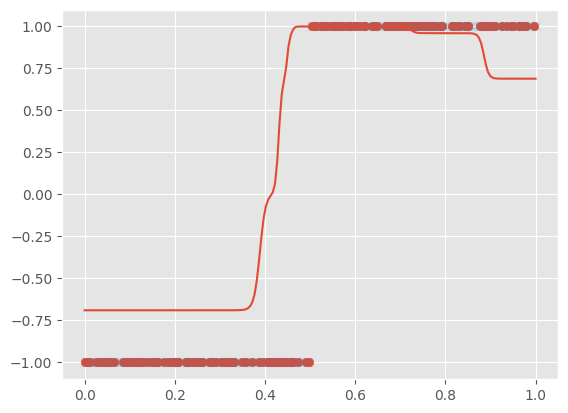

In [7]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='x', alpha=0.1)
plt.plot(x_test, 2*proba-1)

In [8]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [17]:
gpc2 = GaussianProcessClassifier().fit(X_train, y_train)
gpc2.log_marginal_likelihood()

-72.90009625293614

In [10]:
proba = gpc2.predict_proba(X_test)[:, 1]

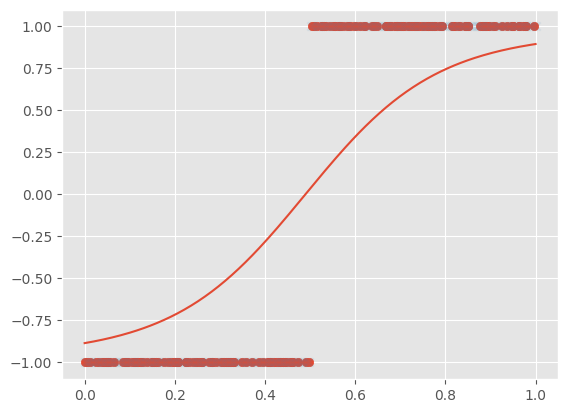

In [11]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, marker='x', alpha=0.1)
plt.plot(x_test, 2*proba-1)

In [53]:
from gp_sandbox.gaussian_processes.kernels import RBF

l = 0.01

rbf = RBF(l, 1)
gpc = GPBinaryClassifier(rbf).fit(X_train, y_train, optimize_parameters=False)
gpc.log_marginal_likelihood()

-91.66543760099657

In [54]:
import sklearn.gaussian_process.kernels as skernels

rbf2 = skernels.ConstantKernel(1)*skernels.RBF(l)
gpc2 = GaussianProcessClassifier(rbf2, optimizer=None).fit(X_train, y_train)
gpc2.log_marginal_likelihood()

-91.66543760102726

In [55]:
rbf = RBF(2, 1)
gpc = GPBinaryClassifier(rbf).fit(X_train, y_train, optimize_parameters=True)
gpc.log_marginal_likelihood()

-6.553279913775181

In [56]:
params = gpc.get_param()
l = np.exp(params['log_l'])
sig = np.exp(params['log_sigma'])

In [57]:
l, sig

(0.2630880202903264, 34.404348859717594)

In [58]:
gpc2 = GaussianProcessClassifier(rbf2).fit(X_train, y_train)
gpc2.log_marginal_likelihood()

/Users/p-j/Desktop/gp_sandbox/.env/lib/python3.10/site-packages/sklearn/gaussian_process/_gpc.py:472: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


-13.247920637933372

122**2 * RBF(length_scale=0.219)